# owid_co2_data

### Author: Joe Muscolino
#### Updated: 10/11/2023

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from matplotlib import rcParams
import matplotlib.pyplot as plt
import random
from datetime import datetime

# 1. Data Exploration and Cleaning

In [18]:
co2_df = pd.read_csv("owid-co2-data.csv")

In [19]:
co2_df.shape

(50598, 79)

In [20]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   42142 non-null  object 
 3   population                                 40008 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [21]:
# View first 5 rows of DataFrame
co2_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [22]:
# Get Percent of missing data in each column, convert the missing_data from a 
# decimal to a percentage and round to 2 decimal places.
missing_data = round(co2_df.isna().sum() / len(co2_df) * 100, 2)
missing_data

country 0.00
year 0.00
iso_code 16.71
population 20.93
gdp 71.22
 ... 
temperature_change_from_n2o 25.65
total_ghg 87.85
total_ghg_excluding_lucf 87.85
trade_co2 91.58
trade_co2_share 91.58
Length: 79, dtype: float64

In [23]:
# Parse index of the Series missing_data and check how much data is missing from column, if 98% or more is missing, drop it. 
for col in missing_data.index:
    if missing_data[col] >= 85:
        co2_df.drop(columns=[col], inplace=True)

co2_df.shape

(50598, 60)

In [24]:
co2_df.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
count,50598.000000,4.000800e+04,1.456400e+04,24974.000000,22714.000000,31349.000000,28944.000000,25032.000000,24218.000000,23917.000000,...,23421.000000,15980.000000,21990.000000,39388.000000,23421.000000,41724.000000,37620.000000,41724.000000,41724.000000,37620.000000
mean,1925.365173,5.926810e+07,2.677586e+11,8.392491,0.063958,380.237549,5.716527,20.492413,499.312724,7.204133,...,3.344629,2.085217,2.827082,2.561769,3.328371,2.190116,0.002956,0.006886,0.010069,0.000497
std,59.882945,3.222866e+08,2.103151e+12,63.009433,0.123023,1801.527942,58.764604,699.580857,2081.497921,92.866497,...,13.024224,9.106761,13.721541,10.092255,12.828399,9.008552,0.016073,0.039684,0.057186,0.002943
min,1750.000000,2.100000e+01,4.998000e+07,0.000000,0.000000,0.000000,-1818.472000,-100.000000,-187.032000,-2317.996000,...,0.000000,0.000000,0.000000,-6.498000,0.000000,-0.899000,-0.001000,0.000000,-0.001000,0.000000
25%,1882.000000,3.198618e+05,7.516679e+09,0.000000,0.000000,0.125000,0.000000,-0.541500,4.646000,-0.572000,...,0.004000,0.000000,0.000000,0.001000,0.005000,0.003000,0.000000,0.000000,0.000000,0.000000
50%,1929.000000,2.323117e+06,2.597999e+10,0.010000,0.005000,3.109000,0.015000,3.783500,24.417000,0.062000,...,0.053000,0.000000,0.000000,0.072000,0.061000,0.071000,0.000000,0.000000,0.000000,0.000000
75%,1975.000000,9.802751e+06,1.132942e+11,0.692000,0.087000,43.730000,0.773000,10.569000,113.381250,2.325000,...,0.493000,0.051000,0.123000,0.485000,0.518000,0.329000,0.001000,0.001000,0.001000,0.000000
max,2021.000000,7.909295e+09,1.136302e+14,1672.592000,2.574000,37123.852000,1859.764000,102318.508000,41639.840000,2246.723000,...,100.000000,100.000000,100.000000,100.675000,100.000000,100.000000,0.415000,1.113000,1.611000,0.083000


# 2. Data Analysis

## A. Population by Year

In [36]:
world_data = co2_df[co2_df["country"] == 'World']
world_population_data = world_data.dropna(subset=['population', 'co2'])
world_population_by_year = world_population_data.groupby("year").aggregate({"population":"sum", "co2":"sum", "co2_per_gdp":"sum", "co2_per_capita": "sum", "gdp":"sum"})
world_population_by_year.describe()

,population,co2,co2_per_gdp,co2_per_capita,gdp
count,2.270000e+02,227.000000,227.000000,227.000000,2.270000e+02
mean,2.604209e+09,7648.645317,0.033348,1.794502,2.724402e+12
std,1.917268e+09,10641.587574,0.134611,1.679541,1.490740e+13
min,7.456641e+08,9.351000,0.000000,0.013000,0.000000e+00
25%,1.281864e+09,203.178000,0.000000,0.158500,0.000000e+00
50%,1.737875e+09,2888.308000,0.000000,1.567000,0.000000e+00
75%,3.302162e+09,11073.604000,0.000000,3.353000,0.000000e+00
max,7.909295e+09,37123.852000,0.815000,4.888000,1.136302e+14


## B. World CO2 Emissions vs Population

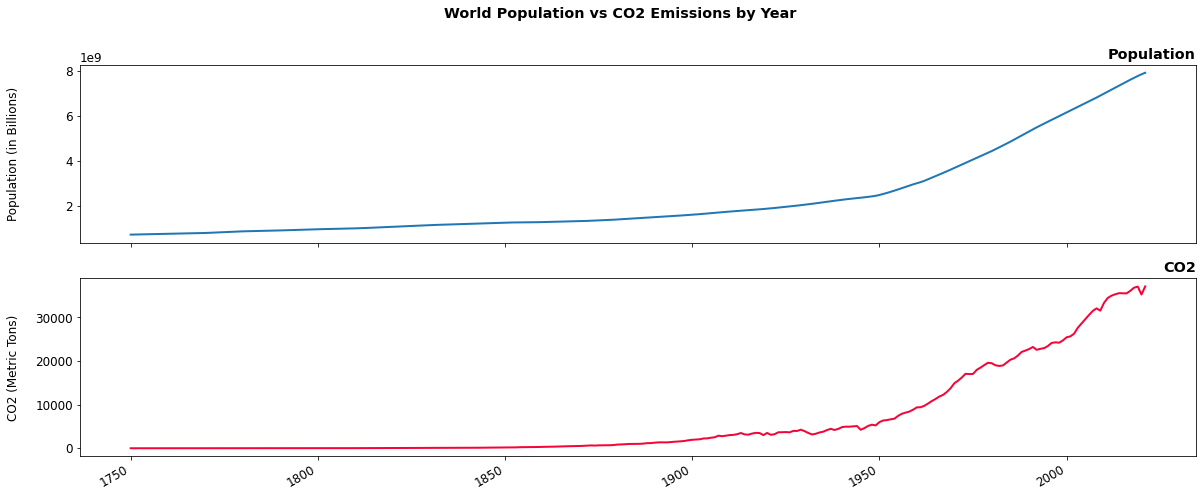

In [43]:
# Plot World Population and CO2 Emissions

fig, axs = plt.subplots(2, sharex=True,figsize=(20,8))
fig.suptitle('World Population vs CO2 Emissions by Year',fontweight='bold')

# Plot Data
plt.rcParams.update({'font.size': 12})

axs[0].plot(world_population_by_year.index.to_list(), world_population_by_year["population"],linewidth ='2.0')
axs[1].plot(world_population_by_year.index.to_list(), world_population_by_year["co2"], color="#F50537",linewidth ='2.0')

# Set plot title
axs[0].set_title('Population', loc='right',fontweight='bold')
axs[1].set_title('CO2', loc='right',fontweight='bold')

# Set axis labels
axs[0].set_ylabel('Population (in Billions)', labelpad=45)
axs[1].set_ylabel('CO2 (Metric Tons)', labelpad=15)

plt.gcf().autofmt_xdate()
plt.show()

## C. World Emissions vs Additional Measures

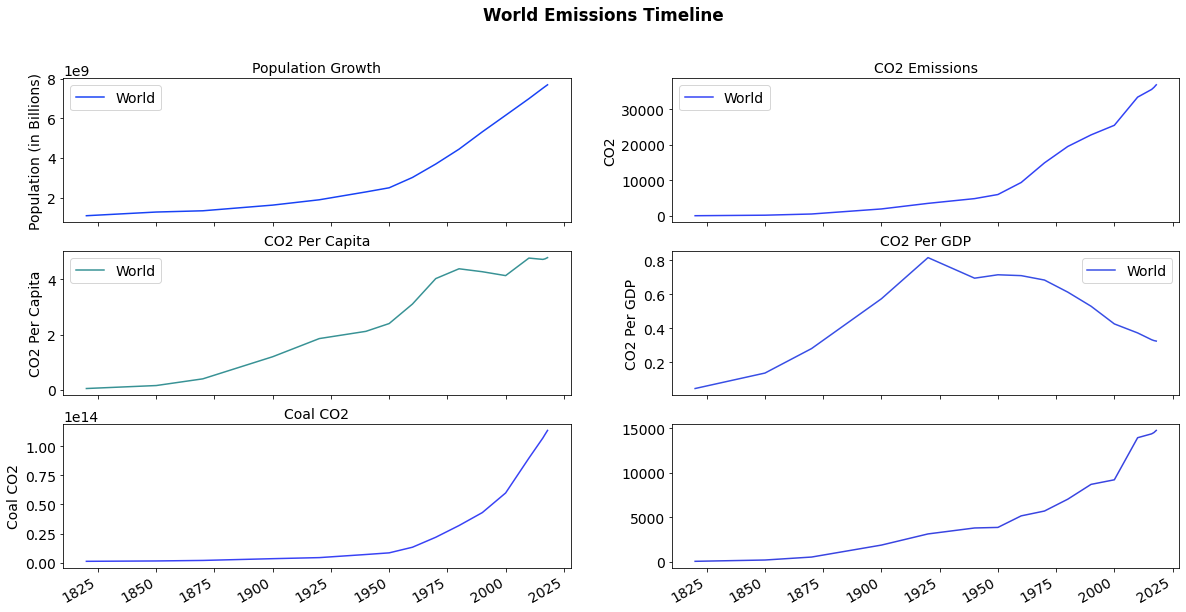

In [45]:
# Create new DataFrame copy where the data is grouped by Country and Year. 
temp = co2_df[co2_df["gdp"] > 0]
country_totals = temp.groupby(["country", "year"]).aggregate({"population":"sum", "co2":"sum", "co2_per_gdp":"sum", "co2_per_capita": "sum", "gdp":"sum", "coal_co2":"sum"})
world = country_totals.loc["World"]


# Plot Data
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('World Emissions Timeline',fontweight='bold')
plt.rcParams.update({'font.size': 14})

# Population comparison
axs[0,0].plot(world.index.to_list(), world["population"], color="#1842f5")


# Co2 comparison
axs[0,1].plot(world.index.to_list(), world["co2"], color="#3242f5")


# GDP comparison
axs[1,1].plot(world.index.to_list(), world["co2_per_gdp"], color="#384ee5")


# GDP comparison
axs[1,0].plot(world.index.to_list(), world["co2_per_capita"], color="#389295")

# GDP comparison
axs[2,0].plot(world.index.to_list(), world["gdp"], color="#3942f5")

# GDP comparison
axs[2,1].plot(world.index.to_list(), world["coal_co2"], color="#3944e1")

# Set plot title
axs[0,0].set_title('Population Growth',fontsize='medium')
axs[0,1].set_title('CO2 Emissions',fontsize='medium')
axs[1,0].set_title('CO2 Per Capita',fontsize='medium')
axs[1,1].set_title('CO2 Per GDP',fontsize='medium')
axs[2,0].set_title('GDP',fontsize='medium')
axs[2,0].set_title('Coal CO2',fontsize='medium')

# Set legend
axs[0,0].legend(["World"])
axs[0,1].legend(["World"])
axs[1,1].legend(["World"])
axs[1,0].legend(["World"])

# Set axis labels
axs[0,0].set_ylabel('Population (in Billions)')
axs[0,1].set_ylabel('CO2')
axs[1,1].set_ylabel('CO2 Per GDP')
axs[1,0].set_ylabel('CO2 Per Capita')
axs[2,0].set_ylabel('GDP')
axs[2,0].set_ylabel('Coal CO2')

plt.gcf().autofmt_xdate()
plt.show()

## D. USA vs China — Emissions, GDP, and Population

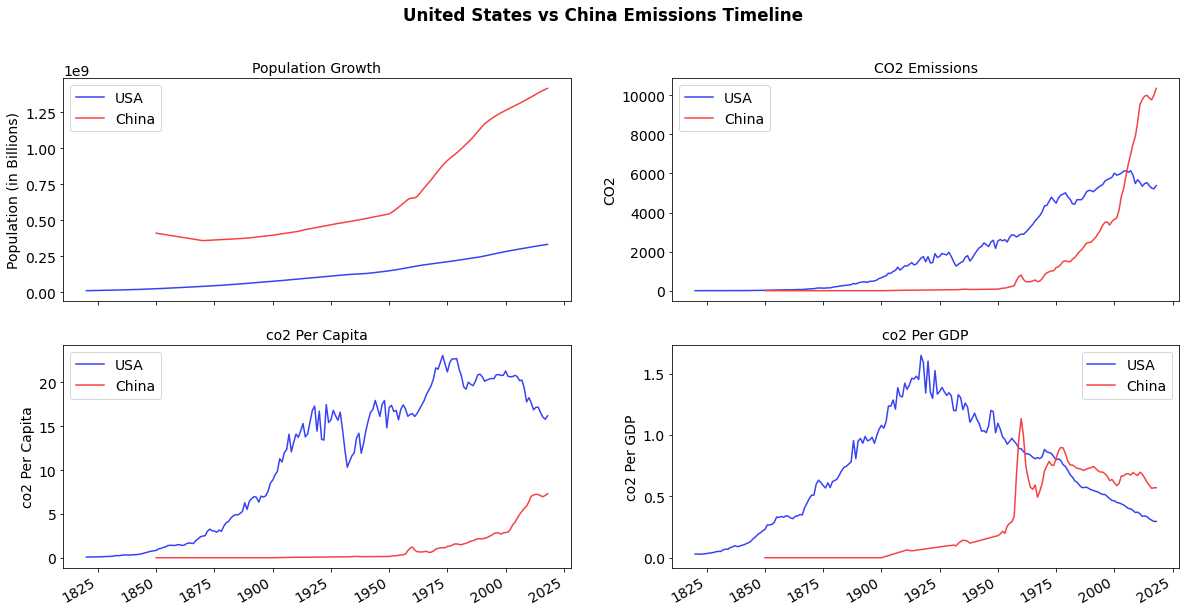

In [47]:
# Create new DataFrame copy where the data is grouped by Country and Year. 
temp = co2_df[co2_df["gdp"] > 0]
country_totals = temp.groupby(["country", "year"]).aggregate({"population":"sum", "co2":"sum", "co2_per_gdp":"sum", "co2_per_capita": "sum", "gdp":"sum"})
usa_co2 = country_totals.loc["United States"]
china_co2 = country_totals.loc["China"]

# Plot Data
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('United States vs China Emissions Timeline',fontweight='bold')
plt.rcParams.update({'font.size': 14})

# Population comparison
axs[0,0].plot(usa_co2.index.to_list(), usa_co2["population"], color="#3842f5")
axs[0,0].plot(china_co2.index.to_list(), china_co2["population"], color="#f54242")

# Co2 comparison
axs[0,1].plot(usa_co2.index.to_list(), usa_co2["co2"], color="#3842f5")
axs[0,1].plot(china_co2.index.to_list(), china_co2["co2"], color="#f54242")

# GDP comparison
axs[1,1].plot(usa_co2.index.to_list(), usa_co2["co2_per_gdp"], color="#3842f5")
axs[1,1].plot(china_co2.index.to_list(), china_co2["co2_per_gdp"], color="#f54242")

# GDP comparison
axs[1,0].plot(usa_co2.index.to_list(), usa_co2["co2_per_capita"], color="#3842f5")
axs[1,0].plot(china_co2.index.to_list(), china_co2["co2_per_capita"], color="#f54242")

# Set plot title
axs[0,0].set_title('Population Growth',fontsize='medium')
axs[0,1].set_title('CO2 Emissions',fontsize='medium')
axs[1,0].set_title('co2 Per Capita',fontsize='medium')
axs[1,1].set_title('co2 Per GDP',fontsize='medium')

# Set legend
axs[0,0].legend(["USA", "China"])
axs[0,1].legend(["USA", "China"])
axs[1,1].legend(["USA", "China"])
axs[1,0].legend(["USA", "China"])

# Set axis labels
axs[0,0].set_ylabel('Population (in Billions)')
axs[0,1].set_ylabel('CO2')
axs[1,1].set_ylabel('co2 Per GDP')
axs[1,0].set_ylabel('co2 Per Capita')


plt.gcf().autofmt_xdate()
plt.show()

## E. United States CO2 and GDP Timeline

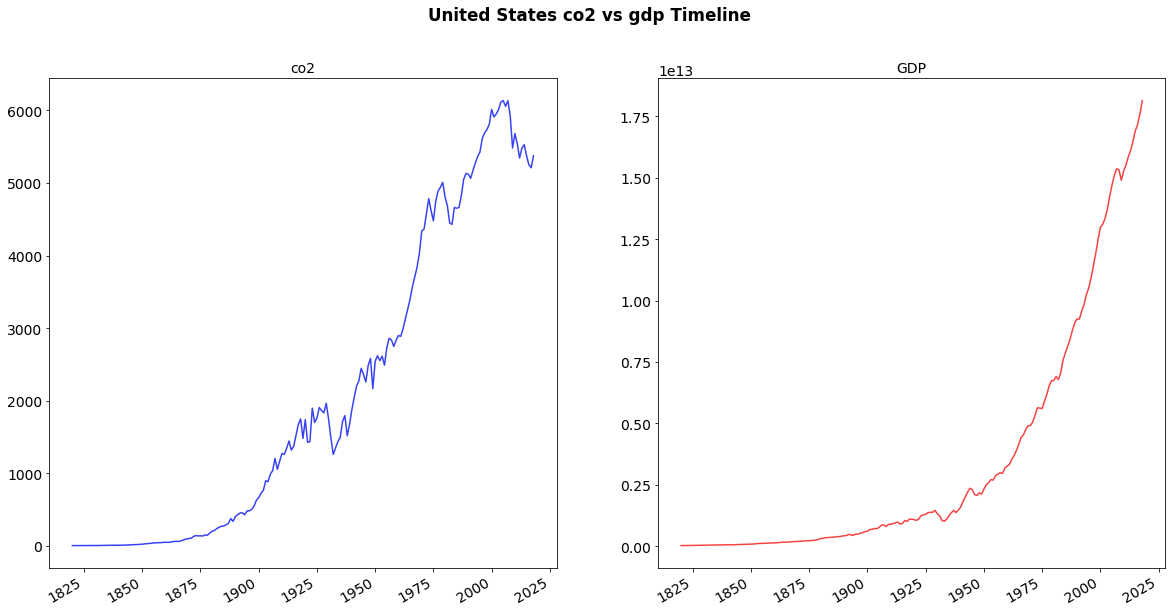

In [28]:
# Plot Data
fig, axs = plt.subplots(1,2, figsize=(20, 10))
fig.suptitle('United States co2 vs gdp Timeline',fontweight='bold')
plt.rcParams.update({'font.size': 14})

# Population comparison
axs[0].plot(usa_co2.index.to_list(), usa_co2["co2"], color="#3842f5")
axs[1].plot(usa_co2.index.to_list(), usa_co2["gdp"], color="#f54242")

axs[0].set_title('co2',fontsize='medium')
axs[1].set_title('GDP',fontsize='medium')

plt.gcf().autofmt_xdate()
plt.show()

## F. CO2 Emissions Ranked by Country

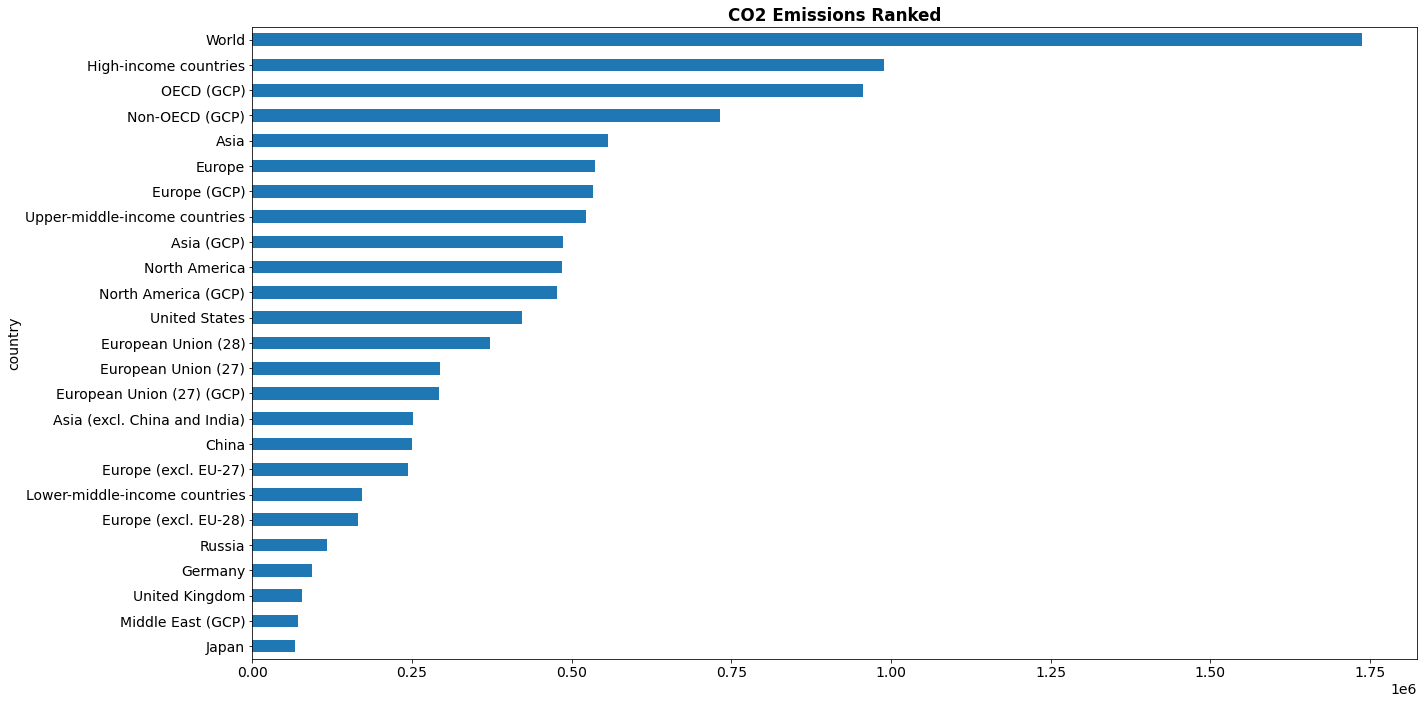

In [53]:
no_missing_co2 = co2_df.dropna(subset=["co2"])

group_country = no_missing_co2.groupby("country").aggregate({"co2":"sum"})
countries = group_country.loc[["United States", "China", "Mexico", "Germany"]]

top5_by_co2 = group_country.sort_values(by="co2", ascending=False)[:25]

top5_by_co2["co2"].sort_values(ascending=True).plot(kind="barh", figsize=(20,10))
# Set plot title
plt.title('CO2 Emissions Ranked',fontweight='bold')

plt.tight_layout()
plt.show()